In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-05/data_1.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1500 non-null   float64
 1   x2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


,x1,x2
0,-6.111197,1.471531
1,-7.496654,0.913425
2,-10.844898,-7.553523
3,-4.543377,-2.135686
4,-1.913821,-0.034780


In [3]:
X = df.to_numpy()
X.shape

(1500, 2)

In [4]:
class KMeans_clustering:
    pass
    '''
        An instance of K-Means clustering algorithm
    '''
    def __init__(self, n_clusters=8):
        pass
        '''
            n_clusters: number of clusters
            _centroids: center/ centroid of clusters
            inertia_: sum of squared distances of samples to their closest cluster center
            labels_: labels of input samples
            X: input data
        '''
        self.n_clusters = n_clusters
        self._centroids = []
        self.inertia_ = 0
        self.labels_ = []
        self.X = []
    def fit(self, X):
        if type(X) != np.ndarray:
            X = X.to_numpy()
        N, p = X.shape
        self.X = X
        # random.seed(42)
        k_indices = random.sample(range(0,N),self.n_clusters)
        self._centroids = self.X[k_indices] # random K-samples to be centroids
        pre_clusters = np.zeros((N,1))
        it = 0
        while True:
            pass
            it+=1

            distances = self._calc_dists(self.X, self._centroids)
            self.labels_ = self._iden_cluster(distances) # assign new labels 

            if self._has_convert(pre_labels=pre_clusters, cur_labels=self.labels_):
                break

            pre_clusters = self.labels_
            self._update_centroids(self.X, self.labels_)

        self.inertia_ = self._calc_total_WCV(self.X, self.labels_, self._centroids)

        print('Complete training process in {} iterations'.format(it))
    def _calc_dists(self, X, centroids):
        '''
            Calculate and choose minimum distances of the samples to the centroids
            ----------------------------------
            --| centroid_1 | centroid_2 | centroid_3 | ... | centroid_K 
            -----------------------------------------------------------
            x1|     d11    |     d12    |     d13    | ... |    d1k   |
            -----------------------------------------------------------
            x2|     d21    |     d22    |     d23    | ... |    d2k   |
            -----------------------------------------------------------
            .
            .
            .
            -----------------------------------------------------------
            xn|     dn1    |     dn2    |     dn3    | ... |    dnk   |

            -----------------------------------------------------------

            Params:
                @x: array-like
                    Input data
                @centroids: array-like
                    K centroids as array
            -----------------------------------------------------------
            Return: array-like
                The distances from samples to the centroids
        '''
        return distance.cdist(X, centroids, 'euclidean')
    def _iden_cluster(self, distances):
        '''
            Find the cluster to which each sample belongs
            ---------------------------------------------
            Params:
                @distances: array-like
                    Distances from samples to the centroids
            ---------------------------------------------
            Return: 
                @array-like (typically 1d-array)
                The cluster indices to which samples belong
        '''
        return np.argmin(distances,axis=1)

    def _update_centroids(self, X, labels):
        '''
            Update the centroids following new labels
        '''
        mean = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        self._centroids = mean

    def _calc_total_WCV(self, X, labels, centroids):
        '''
            Calculate the total sum of squared distance of samples to their closted cluster centroid
            ----------------------
            Params: 
                @X: array-like
                    Input data
                @labels: array-like
                    Labels of samples
                @centroids: array-like
                    Centroid of clusters
            ----------------------
            Return: float
                the total sum of squared distances
        '''
        pass 
        WCVs = [np.sum(np.linalg.norm(X[labels == k] - centroids[k],axis=1)**2) for k in range(self.n_clusters)]
        return np.sum(WCVs)
    
    def _has_convert(self, pre_labels, cur_labels):
        pass
        '''
            Verify the algorithm has convert, i.e: the curent label of samples do not differ from before
            ------------------
            Params:
                @pre_labels: array-like (ordinarily, should be 1D vector)
                    Previous labels 
                @cur_labels: array-like (ordinarily, should be 1D vector)
                    Curent labels
            -----------------
            Return: bool
                True for all elements in two vectors are equal.
        '''
        return (pre_labels == cur_labels).all()

    def _predict(self, X_test):
        '''
            Assign labels for unseen data.
            ----------------
            Params: 
                @X_test: array-like
                    Data test
            ----------------
            Return: array-like
                Label of samples 
        '''
        pass
        distances_test = self._calc_dists(X_test, self._centroids)
        test_labels = self._iden_cluster(distances_test)
        return test_labels

    def predict(self, X_test):
        pass
        if type(X_test) != np.ndarray:
            X_test = X_test.to_numpy()
        return self._predict(X_test)
    def display(self, X, labels, ax):
        '''
            Visualize outcome
            ----------------
            Params:
                @X: array-like
                    Input data, Note: Dimension of samples must be less or equal to 2
                @ax: array-like
                    axis
            Return: array-like
                axis for plotting
        '''
        if self.X.shape[1] > 2:
            return 'DIMENSION ERROR!!!'
        for k in range(self.n_clusters):
            color = list(np.random.choice(range(256), size=3)/255)
            ax.scatter(X[labels == k,:][:,0], X[labels == k,:][:,1], color=color)
            ax.scatter(self._centroids[k,0], self._centroids[k,1], c='r', marker='*',s=150)
#         ax.axis('equal')
        return ax
    

In [5]:
def elbow_method(n_clusters_arr, X):
    pass
    total_wcss = []
    for k in n_clusters_arr:
        kmeans_model = KMeans_clustering(n_clusters=k)
        print(f'Model with number of cluster={k}: ',end=" ")
        kmeans_model.fit(X)
        total_wcss.append(kmeans_model.inertia_)

    plt.figure(figsize=(12,7))
    plt.plot(n_clusters_arr, total_wcss, marker='o', color='r')
    plt.ylabel('Total WSS')
    plt.xlabel('Number of cluster')
    plt.show()

Model with number of cluster=2:  Complete training process in 8 iterations
Model with number of cluster=3:  Complete training process in 13 iterations
Model with number of cluster=4:  Complete training process in 9 iterations
Model with number of cluster=5:  Complete training process in 60 iterations
Model with number of cluster=6:  Complete training process in 36 iterations
Model with number of cluster=7:  Complete training process in 20 iterations
Model with number of cluster=8:  Complete training process in 21 iterations


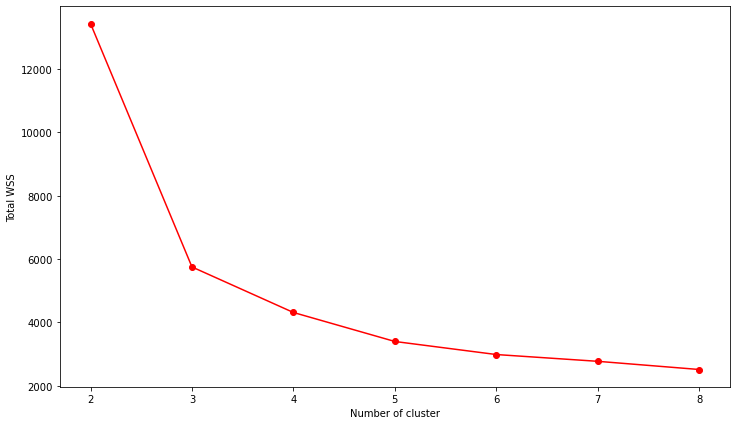

In [6]:
# Elbow method for choosing number of cluster
K_arr = [2, 3, 4, 5, 6, 7, 8]
elbow_method(K_arr, X)

In [7]:
# Model 
model1 = KMeans_clustering(n_clusters=3)
model1.fit(X)
print(model1.inertia_)
print(model1.labels_)

Complete training process in 6 iterations
5747.987366346274
[2 2 0 ... 1 1 1]


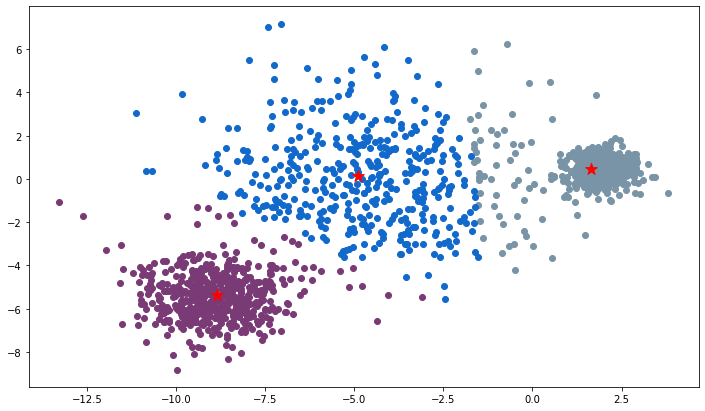

In [8]:
# Plot outcome
fig, ax = plt.subplots(1,1,figsize=(12,7))
model1.display(X,model1.labels_,ax)
plt.show()

In [9]:
# Read data
path = "https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-05/data.csv"
data = pd.read_csv(path)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
#Drop duplicates 
data.drop_duplicates(inplace=True)

In [11]:
# Prepare data
X = data.iloc[:, [2, 3]].values
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)

Model with number of cluster=2:  Complete training process in 5 iterations
Model with number of cluster=3:  Complete training process in 5 iterations
Model with number of cluster=4:  Complete training process in 8 iterations
Model with number of cluster=5:  Complete training process in 8 iterations
Model with number of cluster=7:  Complete training process in 9 iterations
Model with number of cluster=9:  Complete training process in 7 iterations
Model with number of cluster=10:  Complete training process in 13 iterations


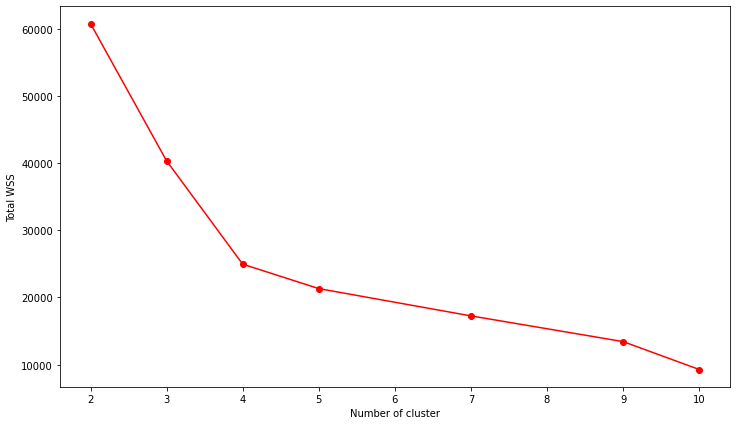

In [12]:
# Elbow method for choosing number of clusters
Ks = [2, 3 , 4, 5, 7, 9, 10]
elbow_method(Ks, X_train)

In [13]:
# Model
model2 = KMeans_clustering(n_clusters=4)
model2.fit(X_train)
pred = model2.predict(X_test)
print(model2.inertia_)
print(model2.labels_)

Complete training process in 15 iterations
24957.08688694415
[2 1 2 0 3 0 0 3 2 0 3 0 0 0 3 2 2 1 1 2 0 3 1 3 3 0 2 3 3 1 0 3 3 0 3 2 0
 0 2 0 2 2 0 0 0 3 1 0 2 0 2 2 0 3 2 2 0 0 3 3 1 0 2 3 0 3 0 0 3 0 3 0 2 0
 1 1 1 3 2 2 3 2 0 2 1 1 2 2 3 2 0 0 3 2 0 0 0 1 2 2 2 2 1 3 3 0 3 2 0 1 0
 3 0 1 3 3 0 0 0 0 0 2 0 2 0 1 3 1 2 2 3 2 1 2]


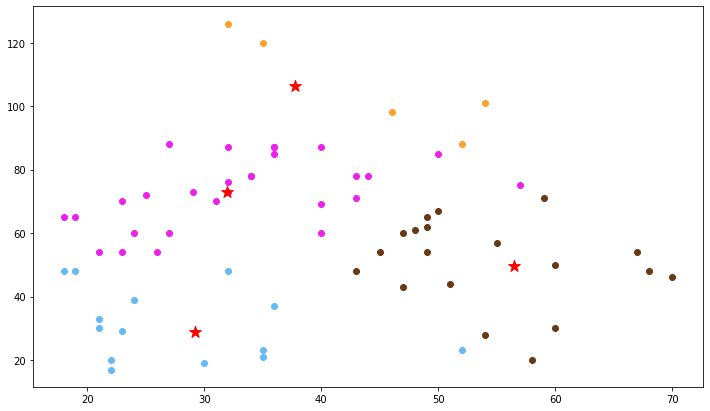

In [15]:
# Plot outcome
fig, ax = plt.subplots(1,1, figsize=(12,7))
model2.display(X_test, pred, ax)
plt.show()